# 2次元データの整理

In [6]:
import numpy as np
import pandas as pd

# Jupyter Notebookの出力を小数点以下3桁に抑える
%precision 3
# Dataframeの出力を小数点以下3桁に抑える
#pd.set_option('precision', 3)
pd.options.display.precision = 3  # pandas 1.4 から

In [7]:
df = pd.read_csv('ch2_scores_em.csv',
                 index_col='生徒番号')

In [8]:
en_scores = np.array(df['英語'])[:10]
ma_scores = np.array(df['数学'])[:10]

scores_df = pd.DataFrame({'英語':en_scores,
                          '数学':ma_scores},
                         index=pd.Index(['A', 'B', 'C', 'D', 'E',
                                         'F', 'G', 'H', 'I', 'J'],
                                        name='生徒'))
scores_df

,英語,数学
生徒,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


## 10. 共分散と相関係数

### 共分散

In [9]:
summary_df = scores_df.copy()
summary_df['英語の偏差'] =\
    summary_df['英語'] - summary_df['英語'].mean()
summary_df['数学の偏差'] =\
    summary_df['数学'] - summary_df['数学'].mean()
summary_df['偏差同士の積'] =\
    summary_df['英語の偏差'] * summary_df['数学の偏差']
summary_df

,英語,数学,英語の偏差,数学の偏差,偏差同士の積
生徒,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [10]:
summary_df['偏差同士の積'].mean()

62.800

In [11]:
cov_mat = np.cov(en_scores, ma_scores, ddof=0)
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [12]:
cov_mat[0, 1], cov_mat[1, 0]

(62.800000000000004, 62.800000000000004)

In [13]:
cov_mat[0, 0], cov_mat[1, 1]

(86.0, 68.44000000000001)

In [14]:
np.var(en_scores, ddof=0), np.var(ma_scores, ddof=0)

(86.0, 68.44000000000001)

### 相関係数

In [17]:
np.cov(en_scores, ma_scores, ddof=0)[0, 1] /\
    (np.std(en_scores) * np.std(ma_scores))

0.8185692341186713

In [15]:
np.corrcoef(en_scores, ma_scores)

array([[1.   , 0.819],
       [0.819, 1.   ]])

In [16]:
scores_df.corr()

,英語,数学
英語,1.000,0.819
数学,0.819,1.000


## 9. 相関図と2変量の関係

## 2次元データの視覚化

### 相関図（散布図）

In [17]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams['font.family'] = 'MS Gothic' # 日本語対応

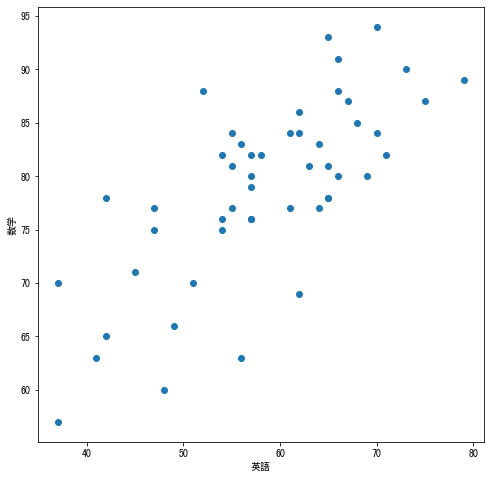

In [18]:
english_scores = np.array(df['英語'])
math_scores = np.array(df['数学'])

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
# 散布図
ax.scatter(english_scores, math_scores)
ax.set_xlabel('英語')
ax.set_ylabel('数学')

plt.show()

### 回帰直線

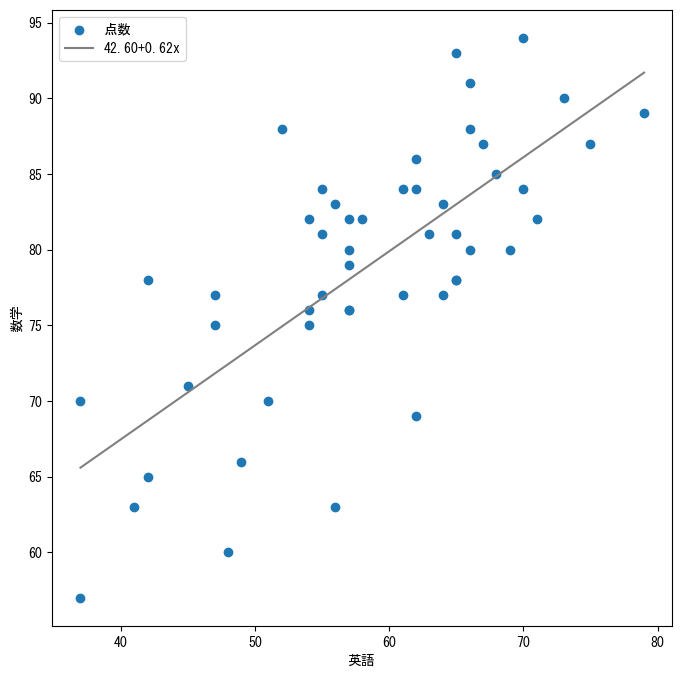

In [6]:
# 係数β_0とβ_1を求める
poly_fit = np.polyfit(english_scores, math_scores, 1)
# β_0+β_1 xを返す関数を作る
poly_1d = np.poly1d(poly_fit)
# 直線を描画するためのx座標を作る
xs = np.linspace(english_scores.min(), english_scores.max())
# xsに対応するy座標を求める
ys = poly_1d(xs)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.scatter(english_scores, math_scores, label='点数')
ax.plot(xs, ys, color='gray',
        label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
ax.set_xlabel('英語')
ax.set_ylabel('数学')
# 凡例の表示
ax.legend(loc='upper left')

plt.show()

### ヒートマップ

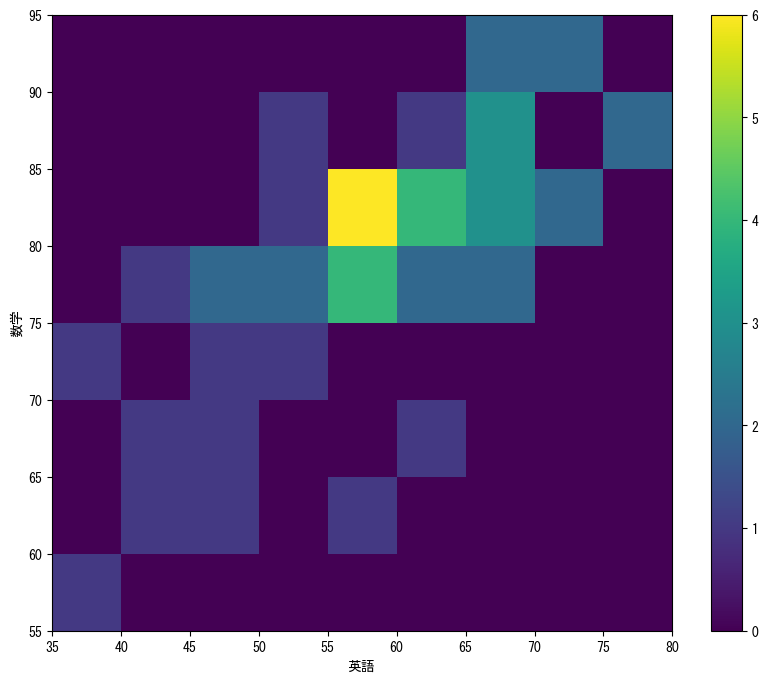

In [7]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.hist2d(english_scores, math_scores,
              bins=[9, 8], range=[(35, 80), (55, 95)])
ax.set_xlabel('英語')
ax.set_ylabel('数学')
ax.set_xticks(c[1])
ax.set_yticks(c[2])
# カラーバーの表示
fig.colorbar(c[3], ax=ax)
plt.show()

## アンスコムの例

数値にデータをまとめることで，多くの情報が失われることに気を付けなければならない．同じような指標を持つデータでも，図示してみると全く異なるデータということも珍しくない．ここではそのような同じ指標をもっているが全く異なるデータという例を，アンスコムの例と呼ばれるデータを使ってみていく．

In [19]:
# npy形式で保存されたNumPy arrayを読み込む
anscombe_data = np.load('ch3_anscombe.npy')
print(anscombe_data.shape)
anscombe_data[0]

(4, 11, 2)


array([[10.  ,  8.04],
       [ 8.  ,  6.95],
       [13.  ,  7.58],
       [ 9.  ,  8.81],
       [11.  ,  8.33],
       [14.  ,  9.96],
       [ 6.  ,  7.24],
       [ 4.  ,  4.26],
       [12.  , 10.84],
       [ 7.  ,  4.82],
       [ 5.  ,  5.68]])

In [20]:
stats_df = pd.DataFrame(index=['Xの平均', 'Xの分散', 'Yの平均',
                               'Yの分散', 'XとYの相関係数',
                               'XとYの回帰直線'])
for i, data in enumerate(anscombe_data):
    dataX = data[:, 0]
    dataY = data[:, 1]
    poly_fit = np.polyfit(dataX, dataY, 1)
    stats_df[f'data{i+1}'] =\
        [f'{np.mean(dataX):.2f}',
         f'{np.var(dataX):.2f}',
         f'{np.mean(dataY):.2f}',
         f'{np.var(dataY):.2f}',
         f'{np.corrcoef(dataX, dataY)[0, 1]:.2f}',
         f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x']
stats_df

,data1,data2,data3,data4
Xの平均,9.00,9.00,9.00,9.00
Xの分散,10.00,10.00,10.00,10.00
Yの平均,7.50,7.50,7.50,7.50
Yの分散,3.75,3.75,3.75,3.75
XとYの相関係数,0.82,0.82,0.82,0.82
XとYの回帰直線,3.00+0.50x,3.00+0.50x,3.00+0.50x,3.00+0.50x


In [ ]:
# グラフを描画する領域を2×2個作る
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10),
                         sharex=True, sharey=True)

xs = np.linspace(0, 30, 100)
for i, data in enumerate(anscombe_data):
    poly_fit = np.polyfit(data[:,0], data[:,1], 1)
    poly_1d = np.poly1d(poly_fit)
    ys = poly_1d(xs)
    # 描画する領域の選択
    ax = axes[i//2, i%2]
    ax.set_xlim([4, 20])
    ax.set_ylim([3, 13])
    # タイトルをつける
    ax.set_title(f'data{i+1}')
    ax.scatter(data[:,0], data[:,1])
    ax.plot(xs, ys, color='gray')

# グラフ同士の間隔を狭くする
plt.tight_layout()
plt.show()